# CS573 Project Report 2

## Load Packages

In [6]:
import pandas as pd
import numpy as np
from collections import Counter
from pandas_profiling import ProfileReport
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_curve, classification_report, plot_roc_curve, plot_precision_recall_curve, roc_auc_score


## Read Data

In [7]:
#read data
df = pd.read_csv("/Users/helenawang/Desktop/CS573/final project/CS573_data.csv")
df

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,000cd9ff5c7aa5448f9ed6058c7b3f6b8504d234fa5cb7...,JF153597,NaN,02/23/2022 12:15:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,2.0,0.0,12,4,2,41.876038,-87.701103,POINT (-87.701103023191 41.876038171488)
1,0052353fae536fede6e12ddeb02d595269b9710f0cb99d...,JF160439,NaN,03/02/2022 12:01:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,0,4,3,41.754258,-87.653105,POINT (-87.653104943768 41.754258080908)
2,0056da66abbbe3801471a3b091e81b7a7a647d8b5370ca...,JF146223,NaN,02/16/2022 11:30:00 AM,15,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR TO REAR,...,0.0,0.0,2.0,0.0,11,4,2,41.909765,-87.743376,POINT (-87.743376295706 41.909764527033)
3,00bf17f37976df288c78c8f3ccc6029818354482437c57...,JF153612,NaN,02/23/2022 12:30:00 PM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAWN,SIDESWIPE SAME DIRECTION,...,0.0,0.0,2.0,0.0,12,4,2,41.783922,-87.607323,POINT (-87.607322913783 41.78392235273)
4,00a06d9bf293ef87873d9ce07631fbf247263cbb747869...,JF160510,NaN,03/02/2022 04:15:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,...,0.0,0.0,3.0,0.0,4,4,3,41.778538,-87.742356,POINT (-87.74235587842 41.778538071066)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598279,d8884f2febe11f475595442df095dc52ccf35b3ca0cde4...,JF161018,NaN,03/02/2022 02:30:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,2.0,0.0,14,4,3,41.867340,-87.641502,POINT (-87.641502099152 41.867340031065)
598280,e732abec9e82d5b35314d4dff9a00e22b03ea3b73ef45f...,JF161081,NaN,03/02/2022 01:45:00 PM,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,ANGLE,...,0.0,0.0,2.0,0.0,13,4,3,41.869311,-87.670599,POINT (-87.670598682097 41.869310907082)
598281,8ec92809e8ce5a174dd081f7ee9f8ff34786d0af53ae2a...,JF161410,NaN,02/19/2022 09:40:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,...,1.0,0.0,1.0,0.0,21,7,2,41.852445,-87.642294,POINT (-87.642294286837 41.852445144074)
598282,c79ab9d471c3942db14ef3ad16497e2ffb28e24ad44b67...,JF160931,NaN,03/01/2022 08:00:00 PM,15,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,20,3,3,41.691679,-87.679779,POINT (-87.679779172526 41.691679204031)


## Data Cleaning

### Remove NA

In [8]:
# number of NA in each row
df.isna().sum()

CRASH_RECORD_ID                       0
RD_NO                              4128
CRASH_DATE_EST_I                 553066
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         399303
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       15356
CRASH_TYPE                            0
INTERSECTION_RELATED_I           461624
NOT_RIGHT_OF_WAY_I               570115
HIT_AND_RUN_I                    415656
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0


In [9]:
#drop variables with more than 100,000 NAs
perserve_column = list() # columns to perserve
for i in df.columns:
    if df[i].isna().sum() < 100000:
        perserve_column.append(i)
df = df[perserve_column]

In [10]:
#drop row with NA
df.dropna(inplace = True)
df.reset_index(drop = True, inplace = True)
df

<ipython-input-10-e473ec215ec2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)


,CRASH_RECORD_ID,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,000cd9ff5c7aa5448f9ed6058c7b3f6b8504d234fa5cb7...,JF153597,02/23/2022 12:15:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT REPORTED,...,0.0,0.0,2.0,0.0,12,4,2,41.876038,-87.701103,POINT (-87.701103023191 41.876038171488)
1,0052353fae536fede6e12ddeb02d595269b9710f0cb99d...,JF160439,03/02/2022 12:01:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ONE-WAY,...,0.0,0.0,1.0,0.0,0,4,3,41.754258,-87.653105,POINT (-87.653104943768 41.754258080908)
2,0056da66abbbe3801471a3b091e81b7a7a647d8b5370ca...,JF146223,02/16/2022 11:30:00 AM,15,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR TO REAR,PARKING LOT,...,0.0,0.0,2.0,0.0,11,4,2,41.909765,-87.743376,POINT (-87.743376295706 41.909764527033)
3,00bf17f37976df288c78c8f3ccc6029818354482437c57...,JF153612,02/23/2022 12:30:00 PM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAWN,SIDESWIPE SAME DIRECTION,PARKING LOT,...,0.0,0.0,2.0,0.0,12,4,2,41.783922,-87.607323,POINT (-87.607322913783 41.78392235273)
4,00a06d9bf293ef87873d9ce07631fbf247263cbb747869...,JF160510,03/02/2022 04:15:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,FOUR WAY,...,0.0,0.0,3.0,0.0,4,4,3,41.778538,-87.742356,POINT (-87.74235587842 41.778538071066)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574191,d8884f2febe11f475595442df095dc52ccf35b3ca0cde4...,JF161018,03/02/2022 02:30:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,...,0.0,0.0,2.0,0.0,14,4,3,41.867340,-87.641502,POINT (-87.641502099152 41.867340031065)
574192,e732abec9e82d5b35314d4dff9a00e22b03ea3b73ef45f...,JF161081,03/02/2022 01:45:00 PM,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,ANGLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,2.0,0.0,13,4,3,41.869311,-87.670599,POINT (-87.670598682097 41.869310907082)
574193,8ec92809e8ce5a174dd081f7ee9f8ff34786d0af53ae2a...,JF161410,02/19/2022 09:40:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,...,1.0,0.0,1.0,0.0,21,7,2,41.852445,-87.642294,POINT (-87.642294286837 41.852445144074)
574194,c79ab9d471c3942db14ef3ad16497e2ffb28e24ad44b67...,JF160931,03/01/2022 08:00:00 PM,15,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,PARKING LOT,...,0.0,0.0,1.0,0.0,20,3,3,41.691679,-87.679779,POINT (-87.679779172526 41.691679204031)


In [11]:
df.isna().sum()

CRASH_RECORD_ID                  0
RD_NO                            0
CRASH_DATE                       0
POSTED_SPEED_LIMIT               0
TRAFFIC_CONTROL_DEVICE           0
DEVICE_CONDITION                 0
WEATHER_CONDITION                0
LIGHTING_CONDITION               0
FIRST_CRASH_TYPE                 0
TRAFFICWAY_TYPE                  0
ALIGNMENT                        0
ROADWAY_SURFACE_COND             0
ROAD_DEFECT                      0
REPORT_TYPE                      0
CRASH_TYPE                       0
DAMAGE                           0
DATE_POLICE_NOTIFIED             0
PRIM_CONTRIBUTORY_CAUSE          0
SEC_CONTRIBUTORY_CAUSE           0
STREET_NO                        0
STREET_DIRECTION                 0
STREET_NAME                      0
BEAT_OF_OCCURRENCE               0
NUM_UNITS                        0
MOST_SEVERE_INJURY               0
INJURIES_TOTAL                   0
INJURIES_FATAL                   0
INJURIES_INCAPACITATING          0
INJURIES_NON_INCAPAC

### Remove Corrupted Data

In [12]:
#generate descriptive statistics of perserved numeric variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
POSTED_SPEED_LIMIT,574196.0,28.338916,6.331716,0.000000,30.000000,30.000000,30.000000,99.00000
STREET_NO,574196.0,3678.545479,2841.536995,1.000000,1234.000000,3200.000000,5600.000000,13799.00000
BEAT_OF_OCCURRENCE,574196.0,1238.439564,706.225488,111.000000,712.000000,1135.000000,1822.000000,2535.00000
NUM_UNITS,574196.0,2.031197,0.439770,1.000000,2.000000,2.000000,2.000000,18.00000
INJURIES_TOTAL,574196.0,0.176954,0.543201,0.000000,0.000000,0.000000,0.000000,21.00000
INJURIES_FATAL,574196.0,0.000932,0.033084,0.000000,0.000000,0.000000,0.000000,3.00000
INJURIES_INCAPACITATING,574196.0,0.018934,0.160048,0.000000,0.000000,0.000000,0.000000,6.00000
INJURIES_NON_INCAPACITATING,574196.0,0.099250,0.404919,0.000000,0.000000,0.000000,0.000000,21.00000
INJURIES_REPORTED_NOT_EVIDENT,574196.0,0.057837,0.307159,0.000000,0.000000,0.000000,0.000000,15.00000
INJURIES_NO_INDICATION,574196.0,2.011810,1.159167,0.000000,1.000000,2.000000,2.000000,61.00000


By observing the above table, we can see that the variable 'INJURIES_UNKNOWN' is 0 for all data. Therefore, we will remove it. Furthermore, we will remove the data that has 0 in 'LATITUDE' or 0 in 'LONGITUDE'.

In [13]:
df.drop(['INJURIES_UNKNOWN'], axis = 1, inplace = True)
df

/Users/helenawang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,CRASH_RECORD_ID,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,000cd9ff5c7aa5448f9ed6058c7b3f6b8504d234fa5cb7...,JF153597,02/23/2022 12:15:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT REPORTED,...,0.0,0.0,0.0,2.0,12,4,2,41.876038,-87.701103,POINT (-87.701103023191 41.876038171488)
1,0052353fae536fede6e12ddeb02d595269b9710f0cb99d...,JF160439,03/02/2022 12:01:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ONE-WAY,...,0.0,0.0,0.0,1.0,0,4,3,41.754258,-87.653105,POINT (-87.653104943768 41.754258080908)
2,0056da66abbbe3801471a3b091e81b7a7a647d8b5370ca...,JF146223,02/16/2022 11:30:00 AM,15,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR TO REAR,PARKING LOT,...,0.0,0.0,0.0,2.0,11,4,2,41.909765,-87.743376,POINT (-87.743376295706 41.909764527033)
3,00bf17f37976df288c78c8f3ccc6029818354482437c57...,JF153612,02/23/2022 12:30:00 PM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAWN,SIDESWIPE SAME DIRECTION,PARKING LOT,...,0.0,0.0,0.0,2.0,12,4,2,41.783922,-87.607323,POINT (-87.607322913783 41.78392235273)
4,00a06d9bf293ef87873d9ce07631fbf247263cbb747869...,JF160510,03/02/2022 04:15:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,FOUR WAY,...,0.0,0.0,0.0,3.0,4,4,3,41.778538,-87.742356,POINT (-87.74235587842 41.778538071066)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574191,d8884f2febe11f475595442df095dc52ccf35b3ca0cde4...,JF161018,03/02/2022 02:30:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,...,0.0,0.0,0.0,2.0,14,4,3,41.867340,-87.641502,POINT (-87.641502099152 41.867340031065)
574192,e732abec9e82d5b35314d4dff9a00e22b03ea3b73ef45f...,JF161081,03/02/2022 01:45:00 PM,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,ANGLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,0.0,2.0,13,4,3,41.869311,-87.670599,POINT (-87.670598682097 41.869310907082)
574193,8ec92809e8ce5a174dd081f7ee9f8ff34786d0af53ae2a...,JF161410,02/19/2022 09:40:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,...,0.0,1.0,0.0,1.0,21,7,2,41.852445,-87.642294,POINT (-87.642294286837 41.852445144074)
574194,c79ab9d471c3942db14ef3ad16497e2ffb28e24ad44b67...,JF160931,03/01/2022 08:00:00 PM,15,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,PARKING LOT,...,0.0,0.0,0.0,1.0,20,3,3,41.691679,-87.679779,POINT (-87.679779172526 41.691679204031)


In [14]:
df = df.loc[(df['LATITUDE'] != 0) & df['LONGITUDE']!=0]
df.reset_index(drop = True, inplace = True)
df

,CRASH_RECORD_ID,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,000cd9ff5c7aa5448f9ed6058c7b3f6b8504d234fa5cb7...,JF153597,02/23/2022 12:15:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT REPORTED,...,0.0,0.0,0.0,2.0,12,4,2,41.876038,-87.701103,POINT (-87.701103023191 41.876038171488)
1,0052353fae536fede6e12ddeb02d595269b9710f0cb99d...,JF160439,03/02/2022 12:01:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ONE-WAY,...,0.0,0.0,0.0,1.0,0,4,3,41.754258,-87.653105,POINT (-87.653104943768 41.754258080908)
2,0056da66abbbe3801471a3b091e81b7a7a647d8b5370ca...,JF146223,02/16/2022 11:30:00 AM,15,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR TO REAR,PARKING LOT,...,0.0,0.0,0.0,2.0,11,4,2,41.909765,-87.743376,POINT (-87.743376295706 41.909764527033)
3,00bf17f37976df288c78c8f3ccc6029818354482437c57...,JF153612,02/23/2022 12:30:00 PM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAWN,SIDESWIPE SAME DIRECTION,PARKING LOT,...,0.0,0.0,0.0,2.0,12,4,2,41.783922,-87.607323,POINT (-87.607322913783 41.78392235273)
4,00a06d9bf293ef87873d9ce07631fbf247263cbb747869...,JF160510,03/02/2022 04:15:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,FOUR WAY,...,0.0,0.0,0.0,3.0,4,4,3,41.778538,-87.742356,POINT (-87.74235587842 41.778538071066)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574159,d8884f2febe11f475595442df095dc52ccf35b3ca0cde4...,JF161018,03/02/2022 02:30:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,...,0.0,0.0,0.0,2.0,14,4,3,41.867340,-87.641502,POINT (-87.641502099152 41.867340031065)
574160,e732abec9e82d5b35314d4dff9a00e22b03ea3b73ef45f...,JF161081,03/02/2022 01:45:00 PM,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,ANGLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,0.0,2.0,13,4,3,41.869311,-87.670599,POINT (-87.670598682097 41.869310907082)
574161,8ec92809e8ce5a174dd081f7ee9f8ff34786d0af53ae2a...,JF161410,02/19/2022 09:40:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,...,0.0,1.0,0.0,1.0,21,7,2,41.852445,-87.642294,POINT (-87.642294286837 41.852445144074)
574162,c79ab9d471c3942db14ef3ad16497e2ffb28e24ad44b67...,JF160931,03/01/2022 08:00:00 PM,15,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,PARKING LOT,...,0.0,0.0,0.0,1.0,20,3,3,41.691679,-87.679779,POINT (-87.679779172526 41.691679204031)


In [15]:
df = df.loc[df['TRAFFIC_CONTROL_DEVICE']!='UNKNOWN']
df = df.loc[df['DEVICE_CONDITION']!='UNKNOWN']
df = df.loc[df['WEATHER_CONDITION']!='UNKNOWN']
df = df.loc[df['LIGHTING_CONDITION']!='UNKNOWN']
df = df.loc[df['TRAFFICWAY_TYPE']!='UNKNOWN']
df = df.loc[df['ROADWAY_SURFACE_COND']!='UNKNOWN']
df = df.loc[df['ROAD_DEFECT']!='UNKNOWN']

len(df)

459855

In [16]:
df.drop(['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE', 'STREET_NAME', 'DATE_POLICE_NOTIFIED', 'LOCATION', 'MOST_SEVERE_INJURY'], axis=1, inplace=True)

In [17]:
df.reset_index(inplace = True, drop = True)

### Remove Outliers

In [18]:
# def outlier_range(df, column_name):
#     Q1 = df[column_name].quantile([0.25, 0.75])[0.25]
#     Q3 = df[column_name].quantile([0.25, 0.75])[0.75]
#     IQR = Q3 - Q1
#     upper = Q3 + 1.5 * IQR
#     lower = Q1 - 1.5 * IQR
#     return (upper, lower)

In [19]:
# for column in numeric_var:
#     if column == 'STREET_NO':
#         continue
#     row_index_out = list() #row index of negative values
#     upper_bound, lower_bound = outlier_range(df, column)
#     for i in range(len(df)):
#         if (df.loc[i, column] > upper_bound) or (df.loc[i, column] < lower_bound):
#             row_index_out.append(i)
#             continue
#     df.drop(row_index_out, inplace = True)
#     df.reset_index(drop = True, inplace = True)

In [20]:
# numeric_var

## Exploratory Data Analysis

### Generate New Variable

In [21]:
#generate a variable 'DAMAGE_over_1500'
damage_over_1500 = list()
for i in range(len(df)):
    if df.loc[i, 'DAMAGE'] == 'OVER $1,500':
        damage_over_1500.append(1)
    else:
        damage_over_1500.append(0)
df['DAMAGE_OVER_1500'] = damage_over_1500
df['DAMAGE_OVER_1500'] = df['DAMAGE_OVER_1500'].astype('category')
df

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,...,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,DAMAGE_OVER_1500
0,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,1.0,0,4,3,41.754258,-87.653105,0
1,15,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR TO REAR,PARKING LOT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,2.0,11,4,2,41.909765,-87.743376,1
2,20,NO CONTROLS,NO CONTROLS,CLEAR,DAWN,SIDESWIPE SAME DIRECTION,PARKING LOT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,2.0,12,4,2,41.783922,-87.607323,0
3,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,3.0,4,4,3,41.778538,-87.742356,1
4,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,3.0,8,4,2,41.924821,-87.685302,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459850,30,NO CONTROLS,NO CONTROLS,CLEAR,DAWN,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,1.0,6,4,2,41.748753,-87.604044,0
459851,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,2.0,14,4,3,41.867340,-87.641502,1
459852,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,ANGLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,2.0,13,4,3,41.869311,-87.670599,1
459853,15,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,PARKING LOT,STRAIGHT ON GRADE,DRY,NO DEFECTS,...,0.0,0.0,0.0,1.0,20,3,3,41.691679,-87.679779,0


In [22]:
df.columns

Index(['POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT',
       'REPORT_TYPE', 'CRASH_TYPE', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION',
       'BEAT_OF_OCCURRENCE', 'NUM_UNITS', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE',
       'DAMAGE_OVER_1500'],
      dtype='object')

### My part of EDA

In [23]:
#variables with its data type and composition
h_col = df.columns[:7]
for i in h_col:
    print(i, ':')
    print('data type:', df[i].dtypes)
    print('Counter:', len(Counter(df[i])))
    print("============================")

POSTED_SPEED_LIMIT :
data type: int64
Counter: 41
TRAFFIC_CONTROL_DEVICE :
data type: object
Counter: 18
DEVICE_CONDITION :
data type: object
Counter: 7
WEATHER_CONDITION :
data type: object
Counter: 11
LIGHTING_CONDITION :
data type: object
Counter: 5
FIRST_CRASH_TYPE :
data type: object
Counter: 18
TRAFFICWAY_TYPE :
data type: object
Counter: 19


In [24]:
n = list()
for i in df.columns:
    n.append(i.lower())
n[21:]

['injuries_incapacitating',
 'injuries_non_incapacitating',
 'injuries_reported_not_evident',
 'injuries_no_indication',
 'crash_hour',
 'crash_day_of_week',
 'crash_month',
 'latitude',
 'longitude',
 'damage_over_1500']

#### POSTED_SPEED_LIMIT

In [25]:
#composition
Counter(df['POSTED_SPEED_LIMIT'])

Counter({30: 340019,
         15: 16130,
         20: 17455,
         35: 31583,
         10: 9497,
         45: 2875,
         25: 28310,
         40: 4585,
         0: 5453,
         5: 3086,
         50: 98,
         55: 351,
         29: 2,
         62: 1,
         39: 51,
         34: 12,
         1: 16,
         3: 120,
         24: 18,
         6: 5,
         14: 3,
         9: 83,
         22: 2,
         11: 7,
         60: 22,
         32: 12,
         12: 2,
         23: 1,
         33: 6,
         7: 2,
         26: 2,
         99: 10,
         2: 17,
         65: 8,
         70: 2,
         63: 1,
         38: 1,
         36: 1,
         4: 2,
         18: 2,
         31: 2})

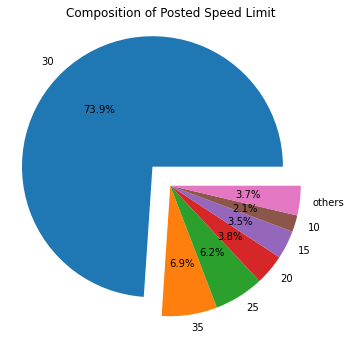

In [26]:
#pie chart
top_6 = Counter(df['POSTED_SPEED_LIMIT']).most_common(6)
other = len(df)
count, speed = list(), list()
for i in range(len(top_6)):
    other -= top_6[i][1]
    count.append(top_6[i][1])
    speed.append(top_6[i][0])
count.append(other)
speed.append('others')

myexplode = [0.2]+ [0]*6

plt.figure(figsize=(6,6))
plt.pie(count, labels = speed, explode = myexplode, autopct='%1.1f%%', textprops={'fontsize': 10})
plt.title('Composition of Posted Speed Limit')
plt.savefig('posted_speed_limit', dpi=300, bbox_inches='tight')

We can see that there are approximately 74% of posted speed limit is 30.

#### TRAFFIC_CONTROL_DEVICE

In [27]:
#composition
Counter(df['TRAFFIC_CONTROL_DEVICE'])

Counter({'NO CONTROLS': 272028,
         'TRAFFIC SIGNAL': 133563,
         'OTHER': 2586,
         'STOP SIGN/FLASHER': 47796,
         'OTHER WARNING SIGN': 437,
         'FLASHING CONTROL SIGNAL': 131,
         'RAILROAD CROSSING GATE': 307,
         'DELINEATORS': 142,
         'OTHER RAILROAD CROSSING': 112,
         'OTHER REG. SIGN': 535,
         'SCHOOL ZONE': 158,
         'YIELD': 622,
         'NO PASSING': 21,
         'PEDESTRIAN CROSSING SIGN': 243,
         'LANE USE MARKING': 961,
         'RR CROSSING SIGN': 35,
         'POLICE/FLAGMAN': 167,
         'BICYCLE CROSSING SIGN': 11})

Text(0.5, 1.0, 'Composition of Traffic Control Device')

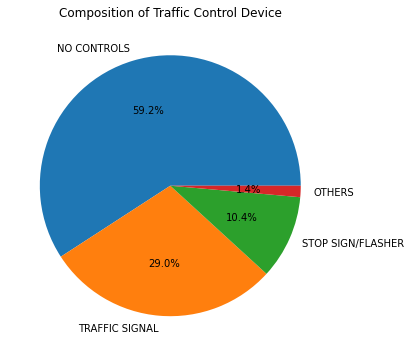

In [28]:
#pie chart
top_3 = Counter(df['TRAFFIC_CONTROL_DEVICE']).most_common(3)
other = len(df)
count, control_device = list(), list()
for i in range(len(top_3)):
    other -= top_3[i][1]
    count.append(top_3[i][1])
    control_device.append(top_3[i][0])
count.append(other)
control_device.append('OTHERS')
plt.figure(figsize=(6,6))
plt.pie(count, labels = control_device, autopct='%1.1f%%', textprops={'fontsize': 10})
plt.title('Composition of Traffic Control Device')
#plt.savefig('traffic_control_device', dpi=300, bbox_inches='tight')

#### DEVICE_CONDITION

In [29]:
#composition
Counter(df['DEVICE_CONDITION'])

Counter({'NO CONTROLS': 278097,
         'FUNCTIONING PROPERLY': 173993,
         'OTHER': 3370,
         'NOT FUNCTIONING': 1606,
         'FUNCTIONING IMPROPERLY': 2516,
         'WORN REFLECTIVE MATERIAL': 214,
         'MISSING': 59})

Text(0.5, 1.0, 'Composition of Device Condition')

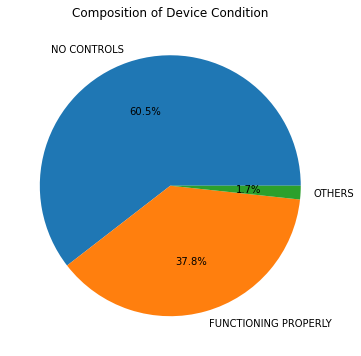

In [30]:
#pie chart
top_2 = Counter(df['DEVICE_CONDITION']).most_common(2)
other = len(df)
count, control_device = list(), list()
for i in range(len(top_2)):
    other -= top_2[i][1]
    count.append(top_2[i][1])
    control_device.append(top_2[i][0])
count.append(other)
control_device.append('OTHERS')
plt.figure(figsize=(6,6))
plt.pie(count, labels = control_device, autopct='%1.1f%%', textprops={'fontsize': 10})
plt.title('Composition of Device Condition')
#plt.savefig('device_condition', dpi=300, bbox_inches='tight')

#### WEATHER_CONDITION

In [31]:
#composition
Counter(df['WEATHER_CONDITION'])

Counter({'CLEAR': 385082,
         'RAIN': 40132,
         'OTHER': 1233,
         'CLOUDY/OVERCAST': 13737,
         'SNOW': 17390,
         'SLEET/HAIL': 631,
         'BLOWING SNOW': 184,
         'FREEZING RAIN/DRIZZLE': 673,
         'SEVERE CROSS WIND GATE': 85,
         'FOG/SMOKE/HAZE': 707,
         'BLOWING SAND, SOIL, DIRT': 1})

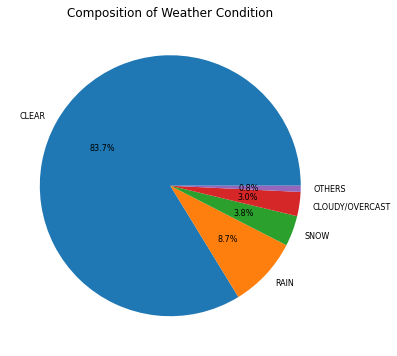

In [32]:
#pie chart
top_4 = Counter(df['WEATHER_CONDITION']).most_common(4)
other = len(df)
count, control_device = list(), list()
for i in range(len(top_4)):
    other -= top_4[i][1]
    count.append(top_4[i][1])
    control_device.append(top_4[i][0])
count.append(other)
control_device.append('OTHERS')
plt.figure(figsize=(6,6))
plt.pie(count, labels = control_device, autopct='%1.1f%%', textprops={'fontsize': 8})
plt.title('Composition of Weather Condition')
plt.savefig('weather_condition', dpi=300, bbox_inches='tight')

We can see that there are approximately 83.7% of weather condition is 'clear'.

#### LIGHTING_CONDITION

In [33]:
#composition
Counter(df['LIGHTING_CONDITION'])

Counter({'DARKNESS, LIGHTED ROAD': 103188,
         'DAYLIGHT': 313806,
         'DAWN': 8032,
         'DARKNESS': 20998,
         'DUSK': 13831})

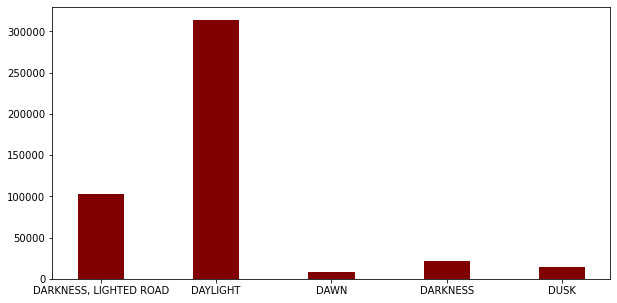

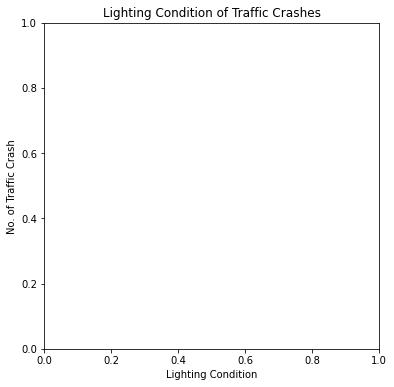

In [34]:
#barplot of LIGHTING_CONDITION
lighting = list(Counter(df['LIGHTING_CONDITION']).keys())
count = list(Counter(df['LIGHTING_CONDITION']).values())
  
fig = plt.figure(figsize = (10, 5))

plt.bar(lighting, count, color ='maroon',
        width = 0.4)
plt.figure(figsize=(6,6))
plt.xlabel("Lighting Condition")
plt.ylabel("No. of Traffic Crash")
plt.title("Lighting Condition of Traffic Crashes")
plt.show()

<AxesSubplot:title={'center':'Stacked Bar Graph of Lighting Condition and Damage'}, xlabel='lighting condition'>

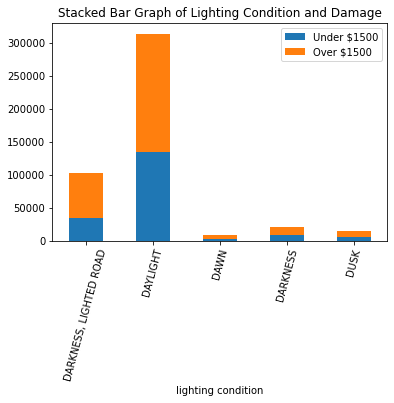

In [35]:
#stacked barplot of LIGHTING_CONDITION
lighting = list(Counter(df['LIGHTING_CONDITION']).keys())
data = list()
for i in lighting:
    n_over_1500 = len(df.loc[(df['LIGHTING_CONDITION']==i) & (df['DAMAGE_OVER_1500']==1)])
    n_under_1500 = len(df.loc[(df['LIGHTING_CONDITION']==i) & (df['DAMAGE_OVER_1500']==0)])
    data.append([i, n_under_1500, n_over_1500])
df_lighting = pd.DataFrame(data, columns = ['lighting condition', 'Under $1500', 'Over $1500'])
df_lighting.plot(x='lighting condition', kind='bar', stacked=True,
        title='Stacked Bar Graph of Lighting Condition and Damage', rot = 75)
#plt.savefig('lighting_condition', dpi=300, bbox_inches='tight')

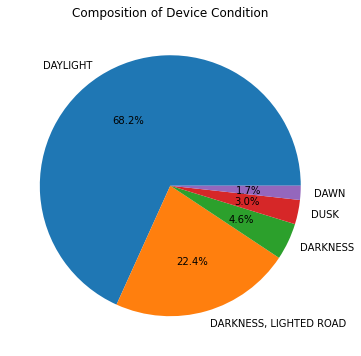

In [36]:
#pie chart
top_5 = Counter(df['LIGHTING_CONDITION']).most_common(5)
count, control_device = list(), list()
for i in range(len(top_5)):
    other -= top_5[i][1]
    count.append(top_5[i][1])
    control_device.append(top_5[i][0])
plt.figure(figsize=(6,6))
plt.pie(count, labels = control_device, autopct='%1.1f%%', textprops={'fontsize': 10})
plt.title('Composition of Device Condition')
#plt.savefig('device_condition', dpi=300, bbox_inches='tight')
plt.savefig('lighting_condition_pie', dpi=300, bbox_inches='tight')

#### FIRST_CRASH_TYPE

In [37]:
#composition
Counter(df['FIRST_CRASH_TYPE'])

Counter({'PARKED MOTOR VEHICLE': 98968,
         'REAR TO REAR': 722,
         'SIDESWIPE SAME DIRECTION': 71337,
         'REAR END': 108680,
         'TURNING': 67251,
         'PEDESTRIAN': 10474,
         'ANGLE': 51065,
         'SIDESWIPE OPPOSITE DIRECTION': 6841,
         'OTHER OBJECT': 4362,
         'OTHER NONCOLLISION': 1451,
         'FIXED OBJECT': 22017,
         'REAR TO FRONT': 3249,
         'REAR TO SIDE': 1932,
         'ANIMAL': 319,
         'HEAD ON': 4009,
         'PEDALCYCLIST': 6871,
         'OVERTURNED': 282,
         'TRAIN': 25})

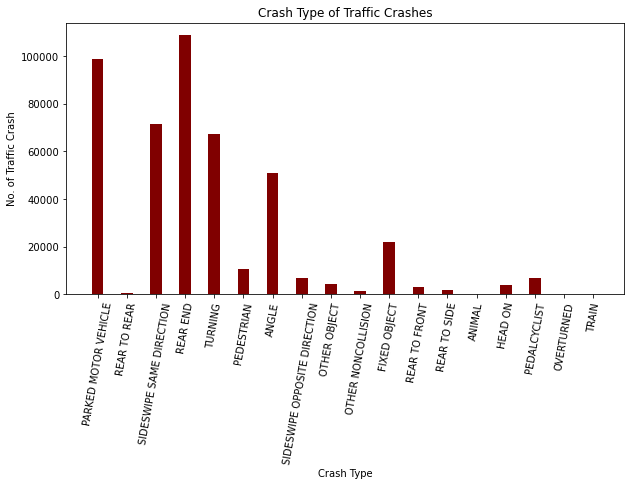

In [38]:
#barplot of FIRST_CRASH_TYPE
crash_type = list(Counter(df['FIRST_CRASH_TYPE']).keys())
count = list(Counter(df['FIRST_CRASH_TYPE']).values())
  
fig = plt.figure(figsize = (10, 5))

plt.bar(crash_type, count, color ='maroon',
        width = 0.4)
 
plt.xlabel("Crash Type")
plt.ylabel("No. of Traffic Crash")
plt.title("Crash Type of Traffic Crashes")
plt.xticks(fontsize = 10, rotation = 80)
plt.show()

<AxesSubplot:title={'center':'Stacked Bar Graph of Crash Type and Damage'}, xlabel='crash type'>

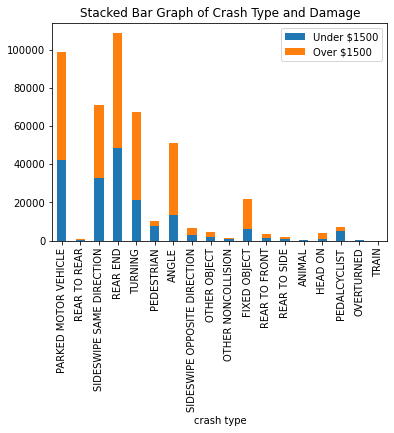

In [39]:
#stacked barplot of FIRST_CRASH_TYPE
crash_type = list(Counter(df['FIRST_CRASH_TYPE']).keys())
data = list()
for i in crash_type:
    n_over_1500 = len(df.loc[(df['FIRST_CRASH_TYPE']==i) & (df['DAMAGE_OVER_1500']==1)])
    n_under_1500 = len(df.loc[(df['FIRST_CRASH_TYPE']==i) & (df['DAMAGE_OVER_1500']==0)])
    data.append([i, n_under_1500, n_over_1500])
df_lighting = pd.DataFrame(data, columns = ['crash type', 'Under $1500', 'Over $1500'])
df_lighting.plot(x='crash type', kind='bar', stacked=True,
        title='Stacked Bar Graph of Crash Type and Damage')
#plt.savefig('crash_type', dpi=300, bbox_inches='tight')

#### TRAFFICWAY_TYPE

In [40]:
#composition
Counter(df['TRAFFICWAY_TYPE'])

Counter({'ONE-WAY': 57897,
         'PARKING LOT': 31160,
         'FOUR WAY': 20031,
         'NOT DIVIDED': 207074,
         'DIVIDED - W/MEDIAN (NOT RAISED)': 82029,
         'T-INTERSECTION': 4096,
         'OTHER': 12428,
         'DIVIDED - W/MEDIAN BARRIER': 28559,
         'ALLEY': 7351,
         'RAMP': 1407,
         'UNKNOWN INTERSECTION TYPE': 845,
         'DRIVEWAY': 1577,
         'TRAFFIC ROUTE': 383,
         'CENTER TURN LANE': 3731,
         'FIVE POINT, OR MORE': 468,
         'Y-INTERSECTION': 469,
         'NOT REPORTED': 181,
         'L-INTERSECTION': 64,
         'ROUNDABOUT': 105})

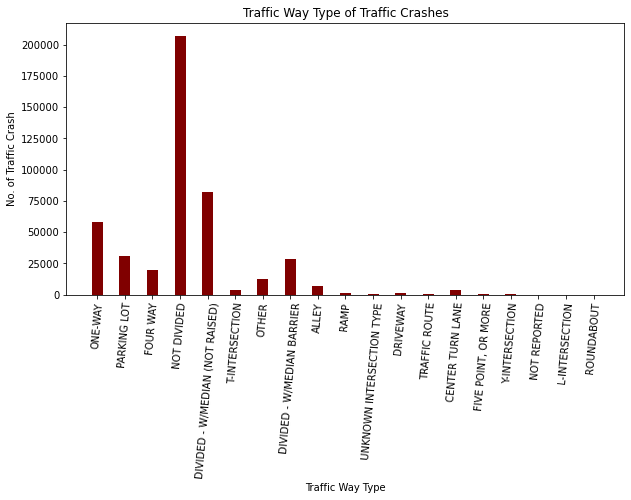

In [41]:
#barplot of TRAFFICWAY_TYPE
traffic_way_type = list(Counter(df['TRAFFICWAY_TYPE']).keys())
count = list(Counter(df['TRAFFICWAY_TYPE']).values())
  
fig = plt.figure(figsize = (10, 5))

plt.bar(traffic_way_type, count, color ='maroon',
        width = 0.4)
 
plt.xlabel("Traffic Way Type")
plt.ylabel("No. of Traffic Crash")
plt.title("Traffic Way Type of Traffic Crashes")
plt.xticks(fontsize = 10, rotation = 85)
plt.show()

<AxesSubplot:title={'center':'Stacked Bar Graph of Traffic Way Type and Damage'}, xlabel='traffic way type'>

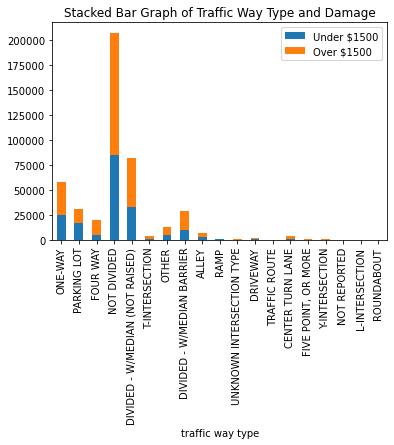

In [42]:
#stacked barplot of TRAFFICWAY_TYPE
traffic_way_type = list(Counter(df['TRAFFICWAY_TYPE']).keys())
data = list()
for i in traffic_way_type:
    n_over_1500 = len(df.loc[(df['TRAFFICWAY_TYPE']==i) & (df['DAMAGE_OVER_1500']==1)])
    n_under_1500 = len(df.loc[(df['TRAFFICWAY_TYPE']==i) & (df['DAMAGE_OVER_1500']==0)])
    data.append([i, n_under_1500, n_over_1500])
df_lighting = pd.DataFrame(data, columns = ['traffic way type', 'Under $1500', 'Over $1500'])
df_lighting.plot(x='traffic way type', kind='bar', stacked=True,
        title='Stacked Bar Graph of Traffic Way Type and Damage')
#plt.savefig('traffic_way_type', dpi=300, bbox_inches='tight')

## Model Selection

In [43]:
df.drop(['DAMAGE'], axis = 1, inplace = True)
df

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,...,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,DAMAGE_OVER_1500
0,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,1.0,0,4,3,41.754258,-87.653105,0
1,15,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR TO REAR,PARKING LOT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,2.0,11,4,2,41.909765,-87.743376,1
2,20,NO CONTROLS,NO CONTROLS,CLEAR,DAWN,SIDESWIPE SAME DIRECTION,PARKING LOT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,2.0,12,4,2,41.783922,-87.607323,0
3,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,3.0,4,4,3,41.778538,-87.742356,1
4,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,3.0,8,4,2,41.924821,-87.685302,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459850,30,NO CONTROLS,NO CONTROLS,CLEAR,DAWN,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,1.0,6,4,2,41.748753,-87.604044,0
459851,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,2.0,14,4,3,41.867340,-87.641502,1
459852,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,ANGLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,2.0,13,4,3,41.869311,-87.670599,1
459853,15,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,PARKING LOT,STRAIGHT ON GRADE,DRY,NO DEFECTS,...,0.0,0.0,0.0,1.0,20,3,3,41.691679,-87.679779,0


In [44]:
df.columns

Index(['POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT',
       'REPORT_TYPE', 'CRASH_TYPE', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION',
       'BEAT_OF_OCCURRENCE', 'NUM_UNITS', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE',
       'DAMAGE_OVER_1500'],
      dtype='object')

In [45]:
df

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,...,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,DAMAGE_OVER_1500
0,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,1.0,0,4,3,41.754258,-87.653105,0
1,15,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR TO REAR,PARKING LOT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,2.0,11,4,2,41.909765,-87.743376,1
2,20,NO CONTROLS,NO CONTROLS,CLEAR,DAWN,SIDESWIPE SAME DIRECTION,PARKING LOT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,2.0,12,4,2,41.783922,-87.607323,0
3,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,3.0,4,4,3,41.778538,-87.742356,1
4,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,3.0,8,4,2,41.924821,-87.685302,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459850,30,NO CONTROLS,NO CONTROLS,CLEAR,DAWN,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,1.0,6,4,2,41.748753,-87.604044,0
459851,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,2.0,14,4,3,41.867340,-87.641502,1
459852,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,ANGLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,2.0,13,4,3,41.869311,-87.670599,1
459853,15,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,PARKING LOT,STRAIGHT ON GRADE,DRY,NO DEFECTS,...,0.0,0.0,0.0,1.0,20,3,3,41.691679,-87.679779,0


In [46]:
#get Categorical variables and Numerical variables
categor_var = df.select_dtypes(include = "object").columns.to_list()
numeric_var = df.select_dtypes(include = ["float", "int"]).columns.to_list()

In [47]:
numeric_var

['POSTED_SPEED_LIMIT',
 'STREET_NO',
 'BEAT_OF_OCCURRENCE',
 'NUM_UNITS',
 'INJURIES_TOTAL',
 'INJURIES_FATAL',
 'INJURIES_INCAPACITATING',
 'INJURIES_NON_INCAPACITATING',
 'INJURIES_REPORTED_NOT_EVIDENT',
 'INJURIES_NO_INDICATION',
 'CRASH_HOUR',
 'CRASH_DAY_OF_WEEK',
 'CRASH_MONTH',
 'LATITUDE',
 'LONGITUDE']

In [48]:
X = df.drop(['DAMAGE_OVER_1500'], axis = 1)
Y = df['DAMAGE_OVER_1500']

In [49]:
X = pd.get_dummies(X)

In [50]:
#split data into train/validation/test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0, stratify = Y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0, stratify = y_train)

In [51]:
scaler = StandardScaler()
scaler.fit(X_train[numeric_var])
X_train[numeric_var] = scaler.fit_transform(X_train[numeric_var])
X_val[numeric_var], X_test[numeric_var] = scaler.transform(X_val[numeric_var]), scaler.transform(X_test[numeric_var])

<ipython-input-51-677b2ac278e5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val[numeric_var], X_test[numeric_var] = scaler.transform(X_val[numeric_var]), scaler.transform(X_test[numeric_var])
/Users/helenawang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [52]:
# #machine learning algorithms
# # lg = LogisticRegression()
# # nb = GaussianNB()
# # knn = KNeighborsClassifier()
# dt = DecisionTreeClassifier()
# sgd = SGDClassifier()
# # rf = RandomForestClassifier()
# # ada = AdaBoostClassifier()
# gbc = GradientBoostingClassifier()
# # lda = LinearDiscriminantAnalysis()
# # qda = QuadraticDiscriminantAnalysis()
# # mlp = MLPClassifier(max_iter = 1000)
# classifier = [dt, sgd, gbc]
# model = ['Decision Tree Classifier', 'Stochastic Gradient Descent (SGD)', 'Gradient Boosting Classifier']
# # classifier = [lg, nb, knn, dt, sgd, rf, ada, gbc, lda, qda, mlp]
# # model = ['Logistic Regression', 'Naive Bayes', 'K Nearest Neighbors (KNN)', 'Decision Tree Classifier',\
# #          'Stochastic Gradient Descent (SGD)', 'Random Forest Classifier',\
# #         'AdaBoost Classifier', 'Gradient Boosting Classifier', 'Linear Discriminant Analysis (LDA)',\
# #         'Quadratic Discriminant Analysis (QDA)', 'Multilayer Perceptron Classification (MLPC)']

In [53]:
# #train model, calculate accuracy and recall
# accuracy, recall = list(), list()
# for algo in classifier:
#     algo.fit(X_train, y_train)
#     y_pred = algo.predict(X_val)
#     accuracy.append(algo.score(X_val, y_val))
#     recall.append(recall_score(y_pred, y_val))

In [54]:
# summary = pd.DataFrame([model, accuracy, recall]).T
# summary.columns = ['model', 'accuracy', 'recall']
# summary

In [55]:
# #machine learning algorithms
# # lg = LogisticRegression()
# # nb = GaussianNB()
# # knn = KNeighborsClassifier()
# # dt = DecisionTreeClassifier()
# # svc = SVC()
# # sgd = SGDClassifier()
# # rf = RandomForestClassifier()
# # ada = AdaBoostClassifier()
# # gbc = GradientBoostingClassifier()
# lda = LinearDiscriminantAnalysis()
# qda = QuadraticDiscriminantAnalysis()
# mlp = MLPClassifier(max_iter = 1000)
# classifier = [lda, qda, mlp]
# model = ['Linear Discriminant Analysis (LDA)',\
#         'Quadratic Discriminant Analysis (QDA)', 'Multilayer Perceptron Classification (MLPC)']
# # classifier = [lg, nb, knn, dt, svc, sgd, rf, ada, gbc, lda, qda, mlp]
# # model = ['Logistic Regression', 'Naive Bayes', 'K Nearest Neighbors (KNN)', 'Decision Tree Classifier',\
# #          'Support Vector Classifier (SVC)', 'Stochastic Gradient Descent (SGD)', 'Random Forest Classifier',\
# #         'AdaBoost Classifier', 'Gradient Boosting Classifier', 'Linear Discriminant Analysis (LDA)',\
# #         'Quadratic Discriminant Analysis (QDA)', 'Multilayer Perceptron Classification (MLPC)']

In [56]:
# accuracy_2, recall_2 = list(), list()
# for algo in classifier:
#     algo.fit(X_train, y_train)
#     y_pred = algo.predict(X_val)
#     accuracy_2.append(algo.score(X_val, y_val))
#     recall_2.append(recall_score(y_pred, y_val))

In [57]:
# summary = pd.DataFrame([model, accuracy_2, recall_2]).T
# summary.columns = ['model', 'accuracy', 'recall']
# summary

In [58]:
# #machine learning algorithms
# lg = LogisticRegression()
# # nb = GaussianNB()
# # knn = KNeighborsClassifier()
# # dt = DecisionTreeClassifier()
# # sgd = SGDClassifier()
# rf = RandomForestClassifier()
# ada = AdaBoostClassifier()
# gbc = GradientBoostingClassifier()
# # lda = LinearDiscriminantAnalysis()
# # qda = QuadraticDiscriminantAnalysis()
# # mlp = MLPClassifier(max_iter = 1000)
# classifier = [lg, rf, ada, gbc]
# model = ['Logistic Regression', 'Random Forest Classifier', 'AdaBoost Classifier', 'Gradient Boosting Classifier']
# # classifier = [lg, nb, knn, dt, sgd, rf, ada, gbc, lda, qda, mlp]
# # model = ['Logistic Regression', 'Naive Bayes', 'K Nearest Neighbors (KNN)', 'Decision Tree Classifier',\
# #         'Stochastic Gradient Descent (SGD)', 'Random Forest Classifier',\
# #         'AdaBoost Classifier', 'Gradient Boosting Classifier', 'Linear Discriminant Analysis (LDA)',\
# #         'Quadratic Discriminant Analysis (QDA)', 'Multilayer Perceptron Classification (MLPC)']

In [59]:
# accuracy_3, fscore_3 = list(), list()
# for algo in classifier:
#     algo.fit(X_train, y_train)
#     y_pred = algo.predict(X_val)
#     accuracy_3.append(algo.score(X_val, y_val))
#     fscore_3.append(f1_score(y_val, y_pred))

In [60]:
# summary = pd.DataFrame([model, accuracy_3, fscore_3]).T
# summary.columns = ['model', 'accuracy', 'f-score']
# summary

## Hyperparameter Tuning

### Gradient Boosting Classifier

In [61]:
# import random
# random.seed(100)
# # lr = [random.randint(1, 30)/100 for i in range(5)]
# # maxdepth = [random.randint(3, 6) for i in range(5)]

# # lr = [0.1, 0.15, 0.2, 0.1, 0.15, 0.2, 0.1, 0.15, 0.2]
# lr = [0.1, 0.1, 0.1, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2]
# maxdepth = [6,6,6,7,7,7,8,8,8]
# print(lr)
# print(maxdepth)

In [62]:
# accuracy, fscore = list(), list()
# for i in range(9):
#     print(i)
#     algo = GradientBoostingClassifier(learning_rate = lr[i], max_depth = maxdepth[i], random_state = 123)
#     algo.fit(X_train, y_train)
#     y_pred = algo.predict(X_val)
#     print('acc: ', algo.score(X_val, y_val))
#     print('fscore: ', f1_score(y_val, y_pred, zero_division = 0))
#     accuracy.append(algo.score(X_val, y_val))
#     fscore.append(f1_score(y_val, y_pred, zero_division = 0))

In [63]:
# result = pd.DataFrame(np.array([lr, maxdepth, accuracy, fscore])).T
# result.drop_duplicates(inplace = True)
# result.columns = ['learning rate', 'max depth', 'accuracy', 'fscore']
# result.sort_values(by = ['fscore', 'accuracy'], ascending = False)

In [64]:
# result = pd.DataFrame(np.array([lr, maxdepth, accuracy, fscore])).T
# result.drop_duplicates(inplace = True)
# result.columns = ['learning rate', 'max depth', 'accuracy', 'fscore']
# result.sort_values(by = ['fscore', 'accuracy'], ascending = False)

### Adaboost Classifier

In [65]:
# lr = [1, 1.25, 1.5, 1.75, 2, 1, 1.25, 1.5, 1.75, 2, 1, 1.25, 1.5, 1.75, 2, 1, 1.25, 1.5, 1.75, 2]
# n_estimators = [50, 50, 50, 50, 50, 75, 75, 75, 75, 75, 100, 100, 100, 100, 100, 125, 125, 125, 125, 125]
# print(len(lr))
# print(n_estimators)

In [66]:
# # ada = AdaBoostClassifier(algorithm = 'SAMME')
# accuracy, fscore = list(), list()
# for i in range(8):
#     print(i, 'learning_rate:', lr[i], ' ', 'n_estimators:', n_estimators[i])
#     algo = AdaBoostClassifier(learning_rate = lr[i], n_estimators = n_estimators[i], algorithm = 'SAMME', random_state = 123)
#     algo.fit(X_train, y_train)
#     y_pred = algo.predict(X_val)
#     print('acc: ', algo.score(X_val, y_val))
#     print('fscore: ', f1_score(y_val, y_pred, zero_division = 0))
#     accuracy.append(algo.score(X_val, y_val))
#     fscore.append(f1_score(y_val, y_pred, zero_division = 0))
#     print('===========================================================================')

In [67]:
# result = pd.DataFrame(np.array([lr, n_estimators, accuracy, fscore])).T
# result.drop_duplicates(inplace = True)
# result.columns = ['learning rate', 'n_estimators', 'accuracy', 'fscore']
# result.sort_values(by = ['accuracy','fscore'], ascending = False)

In [68]:
# # ada = AdaBoostClassifier(algorithm = 'SAMME')
# accuracy_2, fscore_2 = list(), list()
# for i in range(8,20):
#     print(i, 'learning_rate:', lr[i], ' ', 'n_estimators:', n_estimators[i])
#     algo = AdaBoostClassifier(learning_rate = lr[i], n_estimators = n_estimators[i], algorithm = 'SAMME', random_state = 123)
#     algo.fit(X_train, y_train)
#     y_pred = algo.predict(X_val)
#     print('acc: ', algo.score(X_val, y_val))
#     print('fscore: ', f1_score(y_val, y_pred, zero_division = 0))
#     accuracy_2.append(algo.score(X_val, y_val))
#     fscore_2.append(f1_score(y_val, y_pred, zero_division = 0))
#     print('===========================================================================')

In [69]:
# fscore_2

In [70]:
# result = pd.DataFrame(np.array([lr, n_estimators, accuracy_2, fscore_2])).T
# result.drop_duplicates(inplace = True)
# result.columns = ['learning rate', 'n_estimators', 'accuracy', 'fscore']
# result.sort_values(by = ['accuracy','fscore'], ascending = False)

In [94]:
X.columns

Index(['POSTED_SPEED_LIMIT', 'STREET_NO', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS',
       'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
       'INJURIES_NO_INDICATION',
       ...
       'SEC_CONTRIBUTORY_CAUSE_TEXTING',
       'SEC_CONTRIBUTORY_CAUSE_TURNING RIGHT ON RED',
       'SEC_CONTRIBUTORY_CAUSE_UNABLE TO DETERMINE',
       'SEC_CONTRIBUTORY_CAUSE_UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)',
       'SEC_CONTRIBUTORY_CAUSE_VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)',
       'SEC_CONTRIBUTORY_CAUSE_WEATHER', 'STREET_DIRECTION_E',
       'STREET_DIRECTION_N', 'STREET_DIRECTION_S', 'STREET_DIRECTION_W'],
      dtype='object', length=200)

In [71]:
from statistics import mode
a = [0,0,0,0,0,1,1,1,1,1,1]
b = [0,0,1,1,1,0,1,1,1,1,1]
c = [1,1,0,1,1,1,1,1,0,0,0]
answer = list()
for i in range(len(a)):
    answer.append(mode([a[i], b[i], c[i]]))

In [73]:
from statistics import mode
mode([1,0,0,1])

1

In [72]:
?mode

### Blending

In [95]:
# train model
rf = RandomForestClassifier(random_state=123, n_estimators=1000, max_depth=100, min_samples_split=7)
lr = LogisticRegression(C = 4.6416, penalty = 'l2',random_state = 123)
gbc = GradientBoostingClassifier(learning_rate = 0.15, max_depth = 6, random_state = 123)
ada = AdaBoostClassifier(learning_rate = 1.75, n_estimators = 100, algorithm = 'SAMME', random_state = 123)
classifier = [rf, lr, gbc, ada]
for algo in classifier:
    algo.fit(X_train, y_train)

/Users/helenawang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [85]:
from statistics import mode
models = ['rf', 'lr', 'gbc', 'ada']
classifier = [rf, lr, gbc, ada]
y_pred = dict()
acc = dict()
fscore = dict()

for i in range(len(classifier)):
    pred = classifier[i].predict(X_val)
    y_pred[models[i]] = pred
    acc[models[i]] = classifier[i].score(X_val, y_val)
    fscore[models[i]] = f1_score(y_test, pred, zero_division = 0)

In [86]:
print('y_pred:', y_val)
print('==============================================================================================================')
print('acc:', acc)
print('==============================================================================================================')
print('fscore:', fscore)

y_pred: {'rf': array([1, 1, 0, ..., 0, 1, 1]), 'lr': array([1, 1, 1, ..., 0, 1, 0]), 'gbc': array([1, 1, 0, ..., 0, 1, 0]), 'ada': array([1, 1, 1, ..., 1, 1, 0])}
acc: {'rf': 0.6774200563221016, 'lr': 0.6417131487099195, 'gbc': 0.6697545965576106, 'ada': 0.644213937001881}
fscore: {'rf': 0.7418422930335359, 'lr': 0.7088377189107039, 'gbc': 0.7348887550516292, 'ada': 0.7172068101287702}


In [87]:
import numpy as np
y_pred_total = list()
for i in range(len(y_val)):
    y_pred_total.append(mode([y_pred['rf'][i], y_pred['lr'][i], y_pred['gbc'][i], y_pred['ada'][i]]))
y_pred_total = np.asarray(y_pred_total)
y_pred['blend'] = y_pred_total

In [88]:
import numpy as np
y_pred_total_no_lr = list()
for i in range(len(y_val)):
    y_pred_total_no_lr.append(mode([y_pred['rf'][i], y_pred['gbc'][i], y_pred['ada'][i]]))
y_pred_total_no_lr = np.asarray(y_pred_total_no_lr)
y_pred['blend_no_lr'] = y_pred_total_no_lr

In [89]:
# accuracy
acc['blend'] = accuracy_score(y_val, y_pred['blend'])

# f-score
fscore['blend'] = f1_score(y_val, y_val['blend'], zero_division = 0)

In [90]:
# accuracy
acc['blend_no_lr'] = accuracy_score(y_val, y_pred['blend_no_lr'])

# f-score
fscore['blend_no_lr'] = f1_score(y_val, y_pred['blend_no_lr'], zero_division = 0)

In [91]:
print('y_pred:', y_pred)
print('==============================================================================================================')
print('acc:', acc)
print('==============================================================================================================')
print('fscore:', fscore)

y_pred: {'rf': array([1, 1, 0, ..., 0, 1, 1]), 'lr': array([1, 1, 1, ..., 0, 1, 0]), 'gbc': array([1, 1, 0, ..., 0, 1, 0]), 'ada': array([1, 1, 1, ..., 1, 1, 0]), 'blend': array([1, 1, 0, ..., 0, 1, 0]), 'blend_no_lr': array([1, 1, 0, ..., 0, 1, 0])}
acc: {'rf': 0.6774200563221016, 'lr': 0.6417131487099195, 'gbc': 0.6697545965576106, 'ada': 0.644213937001881, 'blend': 0.6725380826564895, 'blend_no_lr': 0.6711572125996238}
fscore: {'rf': 0.7418422930335359, 'lr': 0.7088377189107039, 'gbc': 0.7348887550516292, 'ada': 0.7172068101287702, 'blend': 0.737512746542092, 'blend_no_lr': 0.7368805679287306}


In [92]:
table = {'acc': [], 'fscore': []}
colname = list()
models.append('blend')
models.append('blend_no_lr')
for algo in models:
    table['acc'].append(acc[algo])
    table['fscore'].append(fscore[algo])
    colname.append(algo)

In [93]:
result = pd.DataFrame(table).T
result.columns = colname
result

,rf,lr,gbc,ada,blend,blend_no_lr
acc,0.677420,0.641713,0.669755,0.644214,0.672538,0.671157
fscore,0.741842,0.708838,0.734889,0.717207,0.737513,0.736881


In [98]:
len(X_test)

91971